# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import *
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from tabulate import tabulate
import glob
import os
from sklearn.svm import SVC

# Import data

In [2]:
path = 'CRC/'
df = pd.read_csv(path + "/all_data.csv")
#df = pd.read_csv(path + "P003.MArumugam.Data.AT-CRC_species.csv")

In [3]:
# df = df.reset_index()
# df = df.set_index("index")

In [4]:
lbl=LabelEncoder()
df['condition'] = lbl.fit_transform(df['condition'])

In [5]:
groups = df["Country"].to_numpy()
X = df.drop(["condition","Unnamed: 0", "Country"], axis=1)
#X = df.drop(["condition"], axis=1)
y = df["condition"].to_numpy()

In [6]:
X

,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000083,0.000083
1,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,0.000197,...,0.000000,0.000000,0.000000,0.000788,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,0.002777,...,0.000000,0.000000,0.000194,0.000065,0.000000,0.000840,0.0,0.0,0.001808,0.000000
3,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000086,0.019236,0.001111,0.000256,0.000086,0.000086,0.000000,0.000000,0.000513,0.000000,...,0.000000,0.000171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.000000,0.000118,0.000000,0.000000,0.000059,0.000000,0.000118,0.000000,0.000059,0.000000,...,0.002590,0.000000,0.000000,0.001118,0.000000,0.000000,0.0,0.0,0.000000,0.000000
764,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000075,0.000038,0.000113,0.000113,...,0.000151,0.000000,0.000000,0.000151,0.000038,0.000000,0.0,0.0,0.000000,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000348,0.000044,0.001741,0.000000,0.000435,0.0,0.0,0.000000,0.000044
766,0.000000,0.000312,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.0,0.0,0.000000,0.000156


In [7]:
for i in range(5):
    print(sum(X.iloc[i,:]))

0.9851410810000006
0.9588220579999973
0.9296011780000001
0.9840571469999992
0.9662311640000005


## Dataset names

In [8]:
# some hyper parameters
SEED = 123
test_train_split_SEED = 123
# FOLDS = 10
show_fold_stats = True
VERBOSE = 0
FOLDS = 5

https://github.com/garudlab/Microbiome_PCA_Correction/blob/main/RF_Classifier/classifier.py

In [9]:
unique_groups = list(np.unique(groups))
unique_groups

['AT-CRC_species',
 'CN-CRC_species',
 'DE-CRC_species',
 'FR-CRC_species',
 'IT-CRC-2_species',
 'IT-CRC_species',
 'JP-CRC_species',
 'US-CRC_species']

In [10]:
df.Country[df.Country == 'AT-CRC_species'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
           dtype='int64', length=109)

In [11]:
AUC_scores = pd.DataFrame(index=unique_groups, columns=unique_groups)
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CN-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FR-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-CRC-2_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# for i in range(9):
#     exec(f'ROC_curve_{i} = pd.DataFrame(index=unique_groups, columns=["fpr","tpr","auc"])')
#     print(f'ROC_curve_{i}')

In [13]:
# ROC_curve_1

In [14]:
ROC_curve = pd.DataFrame(index=unique_groups, columns=["fpr","tpr","auc"])
ROC_curve

,fpr,tpr,auc
AT-CRC_species,NaN,NaN,NaN
CN-CRC_species,NaN,NaN,NaN
DE-CRC_species,NaN,NaN,NaN
FR-CRC_species,NaN,NaN,NaN
IT-CRC-2_species,NaN,NaN,NaN
IT-CRC_species,NaN,NaN,NaN
JP-CRC_species,NaN,NaN,NaN
US-CRC_species,NaN,NaN,NaN


In [15]:
#indexing is fine, names are not??
grp = 0
for i in range(len(unique_groups)):
    outer_test_index = list(np.where(df["Country"]==unique_groups[i])[0])
#     print("OUTER TEST",unique_groups[i])
#     print("OUTER TEST",outer_test_index)
    
    inner_group_list = []
    inner_group_list.append(unique_groups[:i] + unique_groups[i+1:])
#     print(inner_group_list)
    
    outer_train_index = list(np.where(df["Country"]!=unique_groups[i])[0])
#     print("OUTER TRAIN",inner_group_list)
#     print("OUTER TRAIN",outer_train_index)
#     print("******************")
    
    #Training dataset
    outer_train_X = X.iloc[outer_train_index]
    outer_train_y = y[outer_train_index]
    
    #Test dataset
    outer_test_X =  X.iloc[outer_test_index]
    outer_test_y =  y[outer_test_index]
    
    for k,name in enumerate(inner_group_list[0]):
        inner_val_index = list(np.where(df["Country"]==name)[0])
#         print("INNER VALIDATION",inner_val_index)
#         print("INNER VALIDATION",name)
        
        inner_train_names = []
        inner_train_names.append(inner_group_list[:k] + inner_group_list[k+1:])
#         print(inner_train_names)
        
        inner_train_index = list(np.where((df["Country"]!=name) & (df["Country"]!=unique_groups[i]))[0])
#         print("INNER TRAIN",inner_train_index)
#         print("INNER TRAIN",inner_train_names)
#         print("########################")
    
        #Inner training dataset
        inner_train_X = X.iloc[inner_train_index]
        inner_train_y = y[inner_train_index]
        
        #Inner validation dataset
        inner_val_X =  X.iloc[inner_val_index]
        inner_val_y =  y[inner_val_index]
        
        
        
        # Random Forest
        clf = RandomForestClassifier(n_estimators = 500, random_state = SEED, verbose = 0, bootstrap=True)
#         clf = SVC(probability = True)
        clf.fit(inner_train_X, inner_train_y)

        RF_pred_class = clf.predict(inner_val_X)
        RF_preds = clf.predict_proba(inner_val_X)

        RF_AUC_test_score = roc_auc_score(inner_val_y, RF_preds[:,1])
        RF_f1_test = f1_score(inner_val_y, RF_pred_class)
        RF_recall_test = recall_score(inner_val_y, RF_pred_class)
        RF_precision_test = precision_score(inner_val_y, RF_pred_class)
        
        #Specificity and sensitivity
        tn, fp, fn, tp = confusion_matrix(inner_val_y, RF_pred_class).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        
        #Adding auc to dataframe
        AUC_scores.at[unique_groups[i], name] = RF_AUC_test_score

        if show_fold_stats:
            print('-' * 80)
            print('Fold : %s'%(k+1),name)
            print('ROC AUC score for RandomForest model, validation set: %.4f'%RF_AUC_test_score)
            print('F1 : %.4f, Recall : %.4f , Precision : %.4f'%(RF_f1_test, RF_recall_test, RF_precision_test))
            print(confusion_matrix(inner_val_y, RF_pred_class))
                
    # Random Forest on logo_test data
    clf = RandomForestClassifier(n_estimators = 500, random_state = SEED, verbose = 0, bootstrap=True)
#     clf = SVC(probability = True)
    clf.fit(outer_train_X, outer_train_y)
        
    RF_pred_class = clf.predict(outer_test_X)
    RF_preds = clf.predict_proba(outer_test_X)

    RF_AUC_test_score = roc_auc_score(outer_test_y, RF_preds[:,1])
    RF_f1_test = f1_score(outer_test_y, RF_pred_class)
    RF_recall_test = recall_score(outer_test_y, RF_pred_class)
    RF_precision_test = precision_score(outer_test_y, RF_pred_class)
    
    #Specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(outer_test_y, RF_pred_class).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    #Adding auc to dataframe
    AUC_scores.at[unique_groups[i], unique_groups[i]] = RF_AUC_test_score
    
    #Getting AUCROC data
    fpr, tpr, _ = roc_curve(outer_test_y,  RF_preds[:,1])

    #Adding roc curve values to dataframe
    ROC_curve.at[unique_groups[i], "fpr"] = ",".join(str(x) for x in fpr)
    ROC_curve.at[unique_groups[i], "tpr"] = ",".join(str(x) for x in tpr)
    ROC_curve.at[unique_groups[i], "auc"] = RF_AUC_test_score
    

    if show_fold_stats:
        print('-' * 80)
        print('-' * 80)
        print('Group : %s'%(grp+1),unique_groups[i])
        print('ROC AUC score for RandomForest model, LOGO test set: %.4f'%RF_AUC_test_score)
        print('F1 : %.4f, Recall : %.4f , Precision : %.4f'%(RF_f1_test, RF_recall_test, RF_precision_test))
        print(confusion_matrix(outer_test_y, RF_pred_class))
        print('-' * 80)
        print('-' * 80)
    grp += 1
        

--------------------------------------------------------------------------------
Fold : 1 CN-CRC_species
ROC AUC score for RandomForest model, validation set: 0.9223
F1 : 0.8000, Recall : 0.8519 , Precision : 0.7541
[[59 15]
 [ 8 46]]
--------------------------------------------------------------------------------
Fold : 2 DE-CRC_species
ROC AUC score for RandomForest model, validation set: 0.8306
F1 : 0.7761, Recall : 0.8667 , Precision : 0.7027
[[38 22]
 [ 8 52]]
--------------------------------------------------------------------------------
Fold : 3 FR-CRC_species
ROC AUC score for RandomForest model, validation set: 0.8597
F1 : 0.7207, Recall : 0.6557 , Precision : 0.8000
[[43 10]
 [21 40]]
--------------------------------------------------------------------------------
Fold : 4 IT-CRC-2_species
ROC AUC score for RandomForest model, validation set: 0.7762
F1 : 0.6984, Recall : 0.7857 , Precision : 0.6286
[[19 13]
 [ 6 22]]
----------------------------------------------------------

--------------------------------------------------------------------------------
Fold : 1 AT-CRC_species
ROC AUC score for RandomForest model, validation set: 0.8722
F1 : 0.8421, Recall : 0.8889 , Precision : 0.8000
[[32 14]
 [ 7 56]]
--------------------------------------------------------------------------------
Fold : 2 CN-CRC_species
ROC AUC score for RandomForest model, validation set: 0.9344
F1 : 0.8130, Recall : 0.9259 , Precision : 0.7246
[[55 19]
 [ 4 50]]
--------------------------------------------------------------------------------
Fold : 3 DE-CRC_species
ROC AUC score for RandomForest model, validation set: 0.8421
F1 : 0.7969, Recall : 0.8500 , Precision : 0.7500
[[43 17]
 [ 9 51]]
--------------------------------------------------------------------------------
Fold : 4 FR-CRC_species
ROC AUC score for RandomForest model, validation set: 0.8611
F1 : 0.7692, Recall : 0.7377 , Precision : 0.8036
[[42 11]
 [16 45]]
------------------------------------------------------------

In [16]:
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,0.883713,0.922297,0.830556,0.859728,0.776228,0.757902,0.828125,0.760725
CN-CRC_species,0.889924,0.927678,0.823056,0.850758,0.814732,0.707615,0.865313,0.763314
DE-CRC_species,0.849034,0.930055,0.830694,0.847046,0.814174,0.761494,0.880312,0.759246
FR-CRC_species,0.875604,0.937062,0.829861,0.865141,0.799107,0.780172,0.889688,0.764793
IT-CRC-2_species,0.872153,0.934434,0.842083,0.86112,0.803571,0.740661,0.879375,0.75943
IT-CRC_species,0.883023,0.927803,0.8425,0.860346,0.794643,0.707615,0.865625,0.784578
JP-CRC_species,0.851449,0.939189,0.865694,0.865295,0.788504,0.703305,0.869375,0.770895
US-CRC_species,0.876121,0.93506,0.828194,0.868079,0.78404,0.73204,0.874375,0.765163


In [17]:
import seaborn as sns

In [18]:
AUC_scores = AUC_scores.apply(pd.to_numeric, errors='coerce')

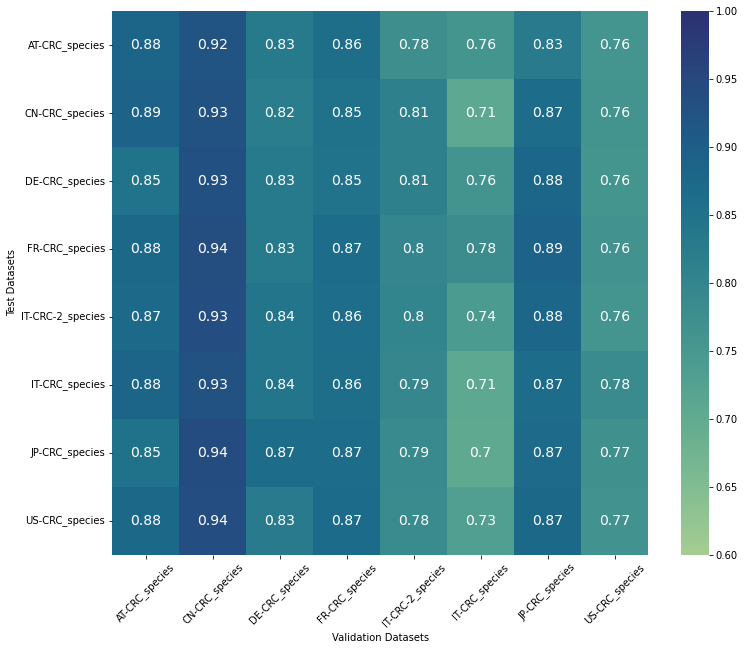

In [19]:
plt.figure(figsize=(12,10))
sns.set_palette("husl", 8)
ax = sns.heatmap(AUC_scores, annot = True, cmap="crest", vmin=0.6, vmax=1.0, annot_kws={"fontsize":14})
ax.set(xlabel="Validation Datasets", ylabel="Test Datasets")
ax.tick_params(axis='x', rotation=45)
# ax.xaxis.tick_top()
# ax.set(title = "AUC scores of Test and Validations Datasets")
plt.savefig("plots/LOSO_1.jpg",dpi=300)

# ROC curves

In [20]:
ROC_curve

,fpr,tpr,auc
AT-CRC_species,"0.0,0.0,0.0,0.0,0.0,0.021739130434782608,0.021...","0.0,0.015873015873015872,0.09523809523809523,0...",0.883713
CN-CRC_species,"0.0,0.0,0.0,0.013513513513513514,0.01351351351...","0.0,0.018518518518518517,0.12962962962962962,0...",0.927678
DE-CRC_species,"0.0,0.0,0.0,0.016666666666666666,0.01666666666...","0.0,0.03333333333333333,0.06666666666666667,0....",0.830694
FR-CRC_species,"0.0,0.0,0.0,0.018867924528301886,0.01886792452...","0.0,0.01639344262295082,0.21311475409836064,0....",0.865141
IT-CRC-2_species,"0.0,0.0,0.0,0.03125,0.03125,0.0625,0.0625,0.09...","0.0,0.03571428571428571,0.14285714285714285,0....",0.803571
IT-CRC_species,"0.0,0.034482758620689655,0.06896551724137931,0...","0.0,0.0,0.0,0.25,0.25,0.2916666666666667,0.291...",0.707615
JP-CRC_species,"0.0,0.0,0.0,0.025,0.025,0.05,0.05,0.075,0.075,...","0.0,0.025,0.3,0.325,0.45,0.45,0.5,0.5,0.55,0.7...",0.869375
US-CRC_species,"0.0,0.0,0.0,0.0,0.019230769230769232,0.0192307...","0.0,0.019230769230769232,0.09615384615384616,0...",0.765163


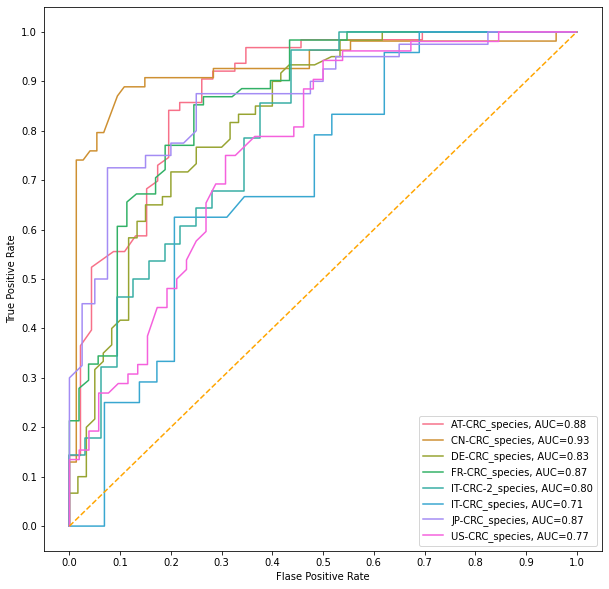

In [21]:
fig = plt.figure(figsize=(10,10))

for i in ROC_curve.index:
#     if aucroc.loc[i]['auc'] > 0.820:
    plt.plot([float(s) for s in ROC_curve.loc[i]['fpr'].split(",")], 
             [float(s) for s in ROC_curve.loc[i]['tpr'].split(",")], 
             label="{}, AUC={:.2f}".format(i, ROC_curve.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate")#, fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate")#, fontsize=15)

# plt.title('ROC Curve Analysis of Test Datasets', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.savefig("plots/LOSO_2.jpg",dpi=300)
plt.show()